## Tehtäväkokonaisuus 6: Datan esikäsittely ja koneoppiminen - tulosanalyysi
### Koneoppimisen tulosten analysointi - harjoitukset

* Tehtävä **6.1**: Datan esikäsittely
* Tehtävä **6.2**: Koneoppiminen kolmella eri menetelmällä
* Tehtävä **6.3**: Tulosten analysointi ja menetelmien vertailu

## Tehtävä 6.0: Opiskelijaryhmän tiedot
* **Kaikkien ryhmään** kuuluvien opiskelijoiden nimet ja JAMK:n opiskelijatunnukset
    * Sanna Immonen AC8402
    * Sanni Kattilakoski AB5134
    * Tomi Nykänen AD7735

Huom! Vain yksi vastaus tähän ryhmätehtävään per ryhmä.
Kaikki vastaukset arvioidaan koko ryhmän jäsenille samalla tavalla.

## Tehtävien pisteytys

* Opintojakson opettaja laskee pisteet palautuksen jälkeen
* Alla kootusti tehtävien maksimipistemäärät

| 6.1 | 6.2 | 6.3 | Yhteensä |
|-----|-----|-----|----------|
| 1p  | 2p  | 2p  | max. 5p  |

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Tehtävä 6.1
## Datan esikäsittely (1 p)

Kysymyksiä tehtävään liittyen
* Kuvaile mitä tässä osiossa tapahtuu?
* Miksi dataa yleisesti ottaen esikäsitellään?
* Millainen on DataFrame, jota tehtävän seuraavien vaiheiden koneoppimisen algoritmit käyttävät
* Mitä muutalle datalle voisi vielä tarvittaessa tehdä ennen koneoppimisvaihetta?

## Vastaus

DataFramesta siivotaan epäolennaiset sarakkeet pois, tarkistetaan missä sarakkeissa on tyhjiä kohtia, täytetään ne ja data muutetaan numeeriseen muotoon.  
* drop() metodilla DataFramesta poistetaan halutut sarakkeet.
* tarkistetaan paljonko puuttuvia arvoja on kussakin muuttujassa
* asetetaan puuttuvan iän kohdalle iän mediaani, joka on 28.
* haetaan metodilla mode() yleisin Embarked-sarakkeen arvo ja asetetaan se puuttuviin kohtiin.
* LabelEncoder()-metodilla muutetaan leimat numeeriseen muotoon eli sen avulla määritellään sukupuolille (Sex) arvot 0 ja 1 sekä laivaan astumispaikoille (Embarked) 0, 1, 2
* Saadaan perhekoko laskemalla sarakkeet SibSp (sisarukset ja puoliso) ja Parch (vanhemmat ja lapset) yhteen
* Lisätään IsAlone sarake. Yksin matkustaneelle asetetaan arvo 1, ja jos perhekoko on suurempi kuin 0, asetetaan isAlone-arvoksi 0
* Lopuksi asetetaan luokkamuuttuja muuttujaan y ja muuttujasta x tiputetaan luokkamuuttuja pois.

Dataa esikäsitellään, jotta saadaan sellaista dataa, jota voidaan hyödyntää ja josta voidaan helposti piirtää kuvaajia. Esikäsittelyn jälkeen dataa voidaan käyttää koulutusaineistona koneoppimismenetelmille tai muille data-analyysimenetelmille. Mallintamista ei voida tehdä, jos arvoja puuttuu tai ne ovat väärässä muodossa.  

DataFrame on kaksiulotteinen taulukko.  

Ennen koneoppimisvaihetta DataFramesta voidaan vielä poistaa päällekkäistä informaatiota. Sarakkeet Parch, SibSp, and FamilySize voidaan poistaa, koska on jo IsAlone -sarake jo kertoo matkustaako henkilö yksin vai ei.

In [3]:
df = pd.read_csv('titanic.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)
print("Puuttuvien arvojen lukumäärä per muuttuja:\n%s" % df.isnull().sum())

median_age = df["Age"].median()
df["Age"] = df["Age"].fillna(median_age)
most_frequent_embarked = df["Embarked"].mode().loc[0]
df["Embarked"] = df["Embarked"].fillna(most_frequent_embarked)

from sklearn.preprocessing import LabelEncoder

sex_le, embarked_le = LabelEncoder(), LabelEncoder()
df["Sex"] = sex_le.fit_transform(df["Sex"])
df["Embarked"] = embarked_le.fit_transform(df["Embarked"])

print(dict(zip(sex_le.classes_, sex_le.transform(sex_le.classes_))))
print(dict(zip(embarked_le.classes_, embarked_le.transform(embarked_le.classes_))))

df["FamilySize"] = df["SibSp"] + df["Parch"]
df["IsAlone"] = 1
df.loc[df["FamilySize"] > 0, "IsAlone"] = 0

y = df["Survived"]
x = df.drop("Survived", axis=1)
x.head()

Puuttuvien arvojen lukumäärä per muuttuja:
Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64
{'female': 0, 'male': 1}
{'C': 0, 'Q': 1, 'S': 2}


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,3,1,22.0,1,0,7.2500,2,1,0
1,1,0,38.0,1,0,71.2833,0,1,0
2,3,0,26.0,0,0,7.9250,2,0,1
3,1,0,35.0,1,0,53.1000,2,1,0
4,3,1,35.0,0,0,8.0500,2,0,1


In [5]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

## Tehtävä 6.2
## Koneoppiminen ensimmäisellä menetelmällä

Kysymyksiä pohdittavaksi?

* Millaisesta menetelmästä on kysymys?
* Miten koneoppiminen tällä menetelmä onnistui?
* Muita huomioita?

## Vastaus

### K-Nearest Neighbor eli K-lähimmän naapurin menetelmä  
Tässä menetelmässä on kyse ohjatusta oppimisesta, ja tarkemmin luokittelusta. Algoritmia voi luokittelun lisäksi käyttää myös regressio-ongelmiin. K-nearest neighbor -algoritmi tallentaa kaikki saatavilla olevat tapaukset ja luokittelee uudet tiedot tai tapaukset samankaltaisuuden perusteella. Käytetään enimmäkseen tietopisteen luokittelemiseen sen perusteella, miten "naapurit" on luokiteltu.
* Testausdatan koko tässä on 30 % ja koulutusdatan koko on 70 %. 
* Ensinnäkin valitaan naapureiden lukumäärä, joten valitaan k = 6 ja lasketaan datapisteiden välinen euklidinen etäisyys. Euklidinen etäisyys on kahden pisteen välinen etäisyys (Pythagoraan lause). 
* Laskemalla euklidisen etäisyyden saa määriteltyä lähimmät naapurit. 
* Naapureiden joukosta lasketaan kunkin luokan datapisteiden määrä ja määritetään uudet datapisteet siihen luokkaan, johon naapurien lukumäärä on suurin. 
* K:lle parhaan arvon määrittämiseksi ei ole mitään erityistä tapaa, joten tässä se on määritelty arvoksi 6.  

![Euclidean](img/euclidean.png)

Accuracy eli tarkkuus kertoo, kuinka hyvin algoritmi on onnistunut uusien havaintojen ennustamisessa eli millä prosentilla malli luokittelee oikein. Tämä mallin onnistumistarkkuus on 70,15% eli tuloksen voidaan sanoa olevan kohtalaisen hyvä. Sekaannusmatriisista käy ilmi, että mallin ennuste menee oikein 144 hukkuneen ja 44 selvinneen osalta, mutta 80 tapausta menee väärin.

![Accuracy](img/accuracy.png)  
Kuva: https://developers.google.com/machine-learning/crash-course/classification/accuracy

Myös kynnysarvon optimointikäyrä (ROC-käyrä) näyttää samankaltaista tulosta kuin tarkkuuslukema. Mitä lähempänä vasenta yläkulmaa käyrä on, sitä parempi tulos on. Toki täysin y-akselin suuntaisesti nouseva käyrä ja lopussa vaakatasoon kääntyvä, on luultavasti ylioppinut.

C:\Users\Jouni\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Jouni\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Jouni\anaconda3\lib\site-packages\sklearn\neighbors\_classification.p

Accuracy: 0.7014925373134329
Confusion matrix:
 [[144  21]
 [ 59  44]]


C:\Users\Jouni\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


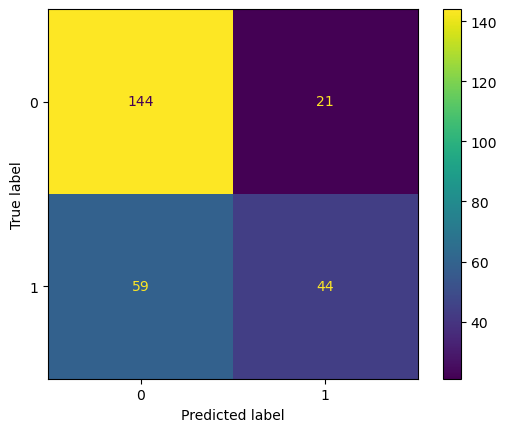

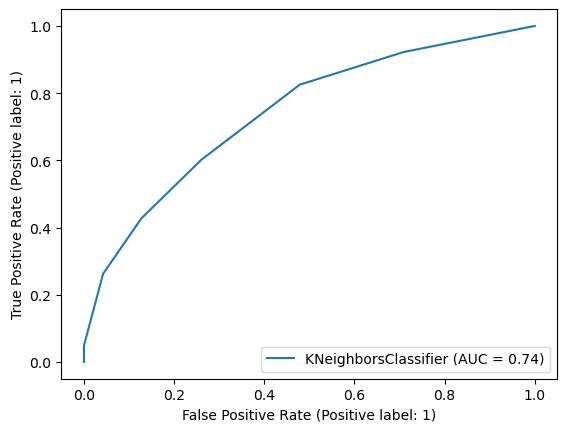

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, roc_curve, plot_roc_curve
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=5313, stratify=y)

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {acc}')
print(f'Confusion matrix:\n {cm}')
plot_confusion_matrix(knn, X_test, y_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)  #, pos_label=2)
plot_roc_curve(knn, X_test, y_test)
plt.show()

## Koneoppiminen toisella menetelmällä

Kysymyksiä pohdittavaksi

* Millaisesta menetelmästä on kysymys?
* Miten koneoppiminen tällä menetelmä onnistui?
* Muita huomioita?

K-Means clustering## Vastaus

### K-Means clustering eli k:n keskiarvon klusterointimenetelmä  
K-Means clustering on ei-valvottu koneoppimisalgoritmi, jossa mallia ei opeteta ensin ennaltatunnettujen leimojen kanssa. Kyse ohjaamattomasta oppimisesta, ja tarkemmin klusteroinnista tai ryhmittelystä. Klusterointi on datan havaintojen jakamista ryhmiin siten, että samankaltaiset havainnot ovat omissa ryhmissään ja ryhmien väliset erot samankaltaisuuden suhteen olisivat mahdollisimman suuret. K-Means klusteroinnissa ajatuksena on asettaa attribuutti K, joka kuvaa klusterien määrää tietojoukossa. Toisin sanoen K kuvaa myös kunkin klusterin keskipistettä.
* Klustereiden määrä tässä on 4 (k=4)
* Jokainen datan 891 näytteestä asetetaan yhteen neljästä ryhmästä eli klusterista sen mukaan, mitä lähimpänä ne ovat valitun etäisyysmitan mukaan
* Todellisia selvinneiden tietoja (Survived = 0 tai 1) verrataan näihin ennusteisiin (0,1,2,3), jonka jälkeen saadaan mallille onnistumisprosentti

Tämä mallin onnistumistarkkuus on 57.58 % eli ei kovinkaan hyvä, jos ajatellaan 50 % tarkkuuden vastaavan kolikon heittoa.

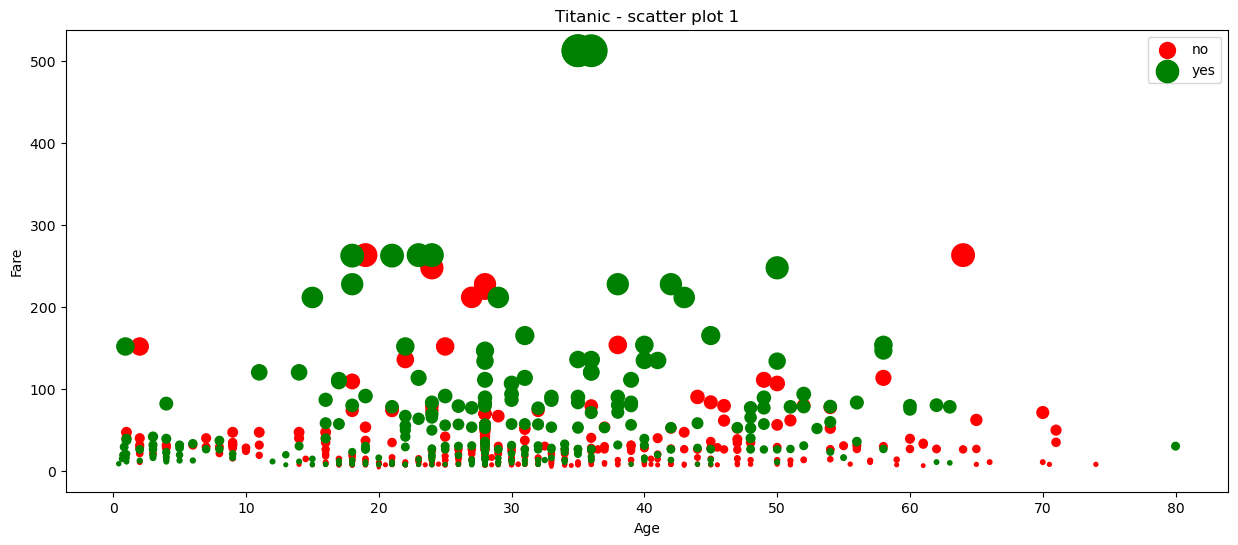

In [7]:
# Tulostetaan datajoukot scatter plot - kuvaajaa käyttäen
plt.figure(2, figsize=(15, 6))

# Ensimmäinen kuvaaja
ax = plt.subplot()
X_out = df[['Survived', 'Age', 'Fare']].copy()
ax.scatter(X_out[X_out['Survived'] == 0]['Age'], X_out[X_out['Survived'] == 0]['Fare'],
           s=X_out[X_out['Survived'] == 0]['Fare'], label='no', c='red')
ax.scatter(X_out[X_out['Survived'] == 1]['Age'], X_out[X_out['Survived'] == 1]['Fare'],
           s=X_out[X_out['Survived'] == 1]['Fare'], label='yes', c='green')
ax.legend()
plt.title("Titanic - scatter plot 1")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

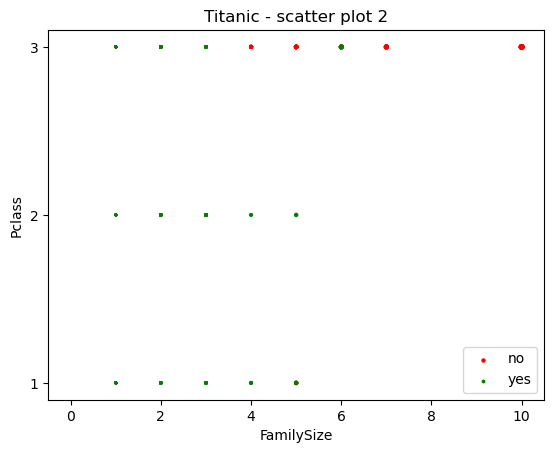

In [8]:
from matplotlib.ticker import MaxNLocator

ax = plt.figure().gca()
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
X_out = df[['Survived', 'FamilySize', 'Pclass']].copy()

ax.scatter(X_out[X_out['Survived'] == 0]['FamilySize'], X_out[X_out['Survived'] == 0]['Pclass'],
           s=X_out[X_out['Survived'] == 0]['FamilySize'], label='no', c='red')
ax.scatter(X_out[X_out['Survived'] == 1]['FamilySize'], X_out[X_out['Survived'] == 1]['Pclass'],
           s=X_out[X_out['Survived'] == 1]['FamilySize'], label='yes', c='green')
ax.legend()
plt.title("Titanic - scatter plot 2")
plt.xlabel("FamilySize")
plt.ylabel("Pclass")
plt.show()

In [33]:
from sklearn.cluster import KMeans

actual_result_df = df['Survived']

km_malli = KMeans(n_clusters=4, max_iter=600, random_state=1523, algorithm='auto')
km_malli.fit(df)

pred = km_malli.predict(df)

res_df = pd.DataFrame({'actual': actual_result_df, 'predicted': pred})

print(res_df.head())
correct_predictions = res_df[res_df['actual'] == res_df['predicted']].count()
print(f"Prediction: {round((correct_predictions['actual'] / len(res_df)) * 100, 2)} %")

   actual  predicted
0       0          0
1       1          3
2       1          0
3       1          3
4       0          0
Prediction: 57.58 %


## Koneoppiminen kolmannella menetelmällä

Kysymyksiä pohdittavaksi

* Millaisesta menetelmästä on kysymys?
* Miten koneoppiminen tällä menetelmä onnistui?
* Muita huomioita?

## Vastaus

### Random Forest eli satunnaismetsä
Random forestissa on kyse ohjatusta oppimisesta, ja tässä sitä käytetään luokitteluun. Algoritmi on päätöksentekopuihin (decision trees) perustuva koneoppimisen malli ja sitä voi käyttää myös regressio-ongelmiin. Käytännössä Random Forest -algoritmi muodostaa päätöksentekopuukokoelman keskimääräisen ennusteen

![Satunnaismetsa](img/satunnaismetsa.png)

Tässä tehtävässä testausdatan kooksi määritellän 30% ja opetusdatan kooksi 70 %. Algoritmi onnistuu uusien havaintojen ennustamisessa 84 %:n tarkkuudella, jota voidaan pitää jo oikein hyvänä tuloksena. Sekaannusmatriisista näkyy, että mallin ennuste menee oikein 150 hukkuneen ja 76 selvinneen osalta, ja 42 tapausta menee väärin. Attribuutilla *feature_importances_* saadaan selville, mitkä ominaisuudet ovat merkityksellisiä ja vaikuttavat eniten luokitteluun. Tässä oleellisimpia tekijöitä ovat sukupuoli (39.4 %), lipun hinta (20.3 %) ja ikä (14.0 %).


In [38]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=5324)

model = RandomForestClassifier(max_depth=6, random_state=2, max_features=3)

model.fit(X_train, y_train)

print("Test accuracy: %.2f" % model.score(X_test, y_test))
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

importances = model.feature_importances_
for i in range(len(importances)):
    print("feature: %12s - relative importance: %4.1f %%" % (x.columns[i], importances[i] * 100))

Test accuracy: 0.84
[[150  14]
 [ 28  76]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.88       164
           1       0.84      0.73      0.78       104

    accuracy                           0.84       268
   macro avg       0.84      0.82      0.83       268
weighted avg       0.84      0.84      0.84       268

feature:       Pclass - relative importance: 10.6 %
feature:          Sex - relative importance: 39.4 %
feature:          Age - relative importance: 14.0 %
feature:        SibSp - relative importance:  3.1 %
feature:        Parch - relative importance:  2.5 %
feature:         Fare - relative importance: 20.3 %
feature:     Embarked - relative importance:  2.5 %
feature:   FamilySize - relative importance:  6.0 %
feature:      IsAlone - relative importance:  1.5 %


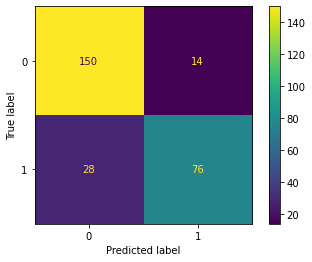

In [10]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()

## Tehtävä 6.3
## Koneoppimismenetelmien vertailu (2 p)

Kysymyksiä pohdittavaksi

* Vertaile kolmea tässä dokumentissa käytettyä koneoppimismenetelmää toisiinsa?
* Miten koneoppiminen näillä eri menetelmillä mielestäsi onnistui?
* Minkä menetelmän valitsisit jatkokäyttöön, jos lähdedata pysyy samana?
* Voiko jonkin koneoppimismenetelmän pudottaa tämän testin perusteella pois?
* Mikä muu kuin valittu koneoppimismenetelmä voi vaikuttaa lopputuloksiin?
* Muita huomioita?

## Tehtävä 6.3 - Vastaus

K-Nearest neighbor ja Random forest ovat valvottuja koneoppimisen algoritmeja eli ne kuuluvat ohjatun oppimisen menetelmiin. Näille on ominaista, että data jaetaan koulutus- ja testausaineistoon ja algoritmi täytyy opettaa koulutusdatalla ennen käyttöä. K-Means clustering puolestaan on ei-valvottu algoritmi eli ohjaamattoman oppimisen menetelmä. Siinä mallia ei tarvitse opettaa etukäteen, vaan data ajetaan algortimille suoraan. Valvottuja koneoppimisen algoritmeja käytetään tässä luokitteluun (molempia voidaan käyttää myös regressioon) ja ei-valvottua algoritmia klusterointiin.

Koneoppimismenetelmistä K-Nearest neighbor- ja Random forest onnistuivat onnistumis/tarkkuusprosenttien perusteella paremmin kun K-Means clustering. Onnistuinen tulos (84 %) saatiin käytettäessä Random forest -algoritmia, joten tämä olisi luonnollinen valinta jatkokäyttöön. Menetelmä vaikuttaa olevan suosittu sen yksinkertaisuuden, mutta tarkan mallin muodostumisen ansiosta. Menetelmistä K-means clusteringin voisi jättää pois heikoimman testituloksen (57.58 %) perusteella. Koneoppimismenetelmän lisäksi lopputuloksiin voi vaikuttaa datan määrä ja laatu, datakäsittelijän virheet, opetus- ja testiaineiston suhde sekä tiettyjen menetelmien yksityiskohdat, kuten K-Nearest neighborissa naapureiden määrä ja K-Means clusteringissa klustereiden määrä tai Random forestissa max_depth:lle asetettu luku.


| Tulos tai ominaisuus | K-Nearest Neighbor | K-Means clustering | Random Forest | Huomioita |
|:--------------------:|:-----------:|:-----------:|:-----------:|:---------:|
|         Luokka       |ohjattu oppiminen|ohjaamaton oppiminen|ohjattu oppiminen|    ...    |
|     Käyttötarkoitus  | luokittelu  |klusterointi/ryhmittely   | luokittelu  |    ...    |
| Testausaineiston koko  |    30 %      |     -    |   30 %    |    ...    |
|  Tarkkuus            |     70.15%  |   57.58 %      |    84 %      |    ...    |
| Onnistuminen          |     Ok      |     kehno     |     hyvä     |    ...    |   


* TODO: Täydennä kirjoittamalla vastaus erilaisten **Koneoppimismenetelmien vertailuista**

* Voit käyttää myös MarkDown table-formaattia kuvaamaan koneoppimismenetelmien välisiä ominaisuuksia tai tuloksia tiiviissä muodossa
  * ks. [md tables](https://www.markdownguide.org/extended-syntax/#tables).

TODO: Alla on *MarkDown table* -taulukko
* Tulosten esittämisen formaatti on täysin ryhmän valittavissa, joten taulukkoformaattia ole pakko käyttää



--------------------------
### Extra: lisäaineistoa
* Tästä eteenpäin olevat aineisto on lisäinformaatiota, mutta sieltä voi myös löytää vinkkejä tehtävään
--------------------------
## Ylimääräisiä esimerkkejä koneoppimisesta

Seuraavassa on muutama **lisäesimerkki**, joka voi herättää lisää ajatuksia koneoppimisalgoritmien soveltamisesta.

* Lähdeaineisto on edelleen Titanic
* Esikäsittely on hieman poikkeava tehtävistä
* Mukana on myös uusi koneoppimismenetelmä

Puuttuvien arvojen lukumäärä per muuttuja:
Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64


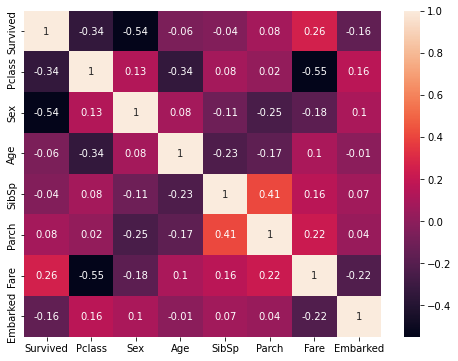

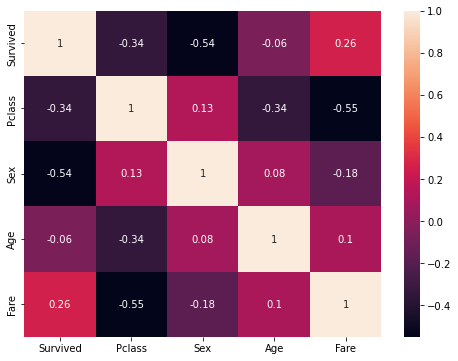

{'female': 0, 'male': 1}
{'C': 0, 'Q': 1, 'S': 2, nan: 3}


,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,0,38.0,71.2833
2,3,0,26.0,7.9250
3,1,0,35.0,53.1000
4,3,1,35.0,8.0500


In [11]:
df = pd.read_csv('titanic.csv')

df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)
print("Puuttuvien arvojen lukumäärä per muuttuja:\n%s" % df.isnull().sum())

median_age = df["Age"].median()
df["Age"] = df["Age"].fillna(median_age)

from sklearn.preprocessing import LabelEncoder

sex_le, embarked_le = LabelEncoder(), LabelEncoder()
df["Sex"] = sex_le.fit_transform(df["Sex"])
df["Embarked"] = embarked_le.fit_transform(df["Embarked"])

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr().round(2), annot=True)
plt.show()

df.drop(["Parch", "SibSp", "Embarked"], axis=1, inplace=True)

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr().round(2), annot=True)
plt.show()

print(dict(zip(sex_le.classes_, sex_le.transform(sex_le.classes_))))
print(dict(zip(embarked_le.classes_, embarked_le.transform(embarked_le.classes_))))
y = df["Survived"]
x = df.drop("Survived", axis=1)
x.head()

Test accuracy: 0.80
[[101   9]
 [ 27  42]]
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       110
           1       0.82      0.61      0.70        69

    accuracy                           0.80       179
   macro avg       0.81      0.76      0.77       179
weighted avg       0.80      0.80      0.79       179

feature:       Pclass - relative importance: 18.0 %
feature:          Sex - relative importance: 43.2 %
feature:          Age - relative importance: 18.1 %
feature:         Fare - relative importance: 20.7 %


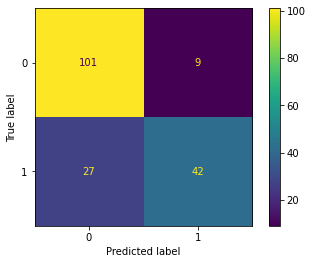

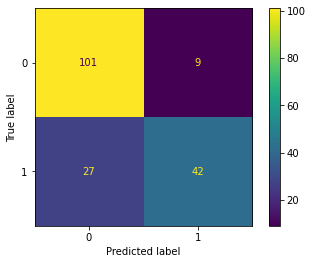

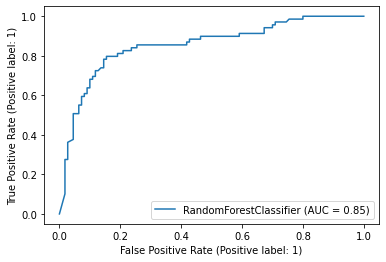

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=54123, stratify=y)

model = RandomForestClassifier(max_depth=6, random_state=2, max_features=4)

model.fit(X_train, y_train)

print("Test accuracy: %.2f" % model.score(X_test, y_test))
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

importances = model.feature_importances_
for i in range(len(importances)):
    print("feature: %12s - relative importance: %4.1f %%" % (x.columns[i], importances[i] * 100))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()

plot_confusion_matrix(model, X_test, y_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plot_roc_curve(model, X_test, y_test)
plt.show()

     Pclass  Sex   Age     Fare
430       1    1  28.0  26.5500
6         1    1  54.0  51.8625
745       1    1  70.0  71.0000
Accuracy: 0.6828358208955224
Confusion matrix:
 [[140  25]
 [ 60  43]]


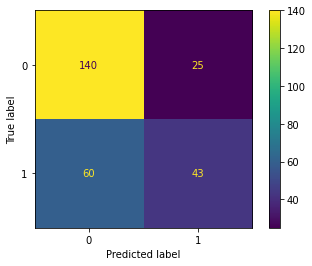

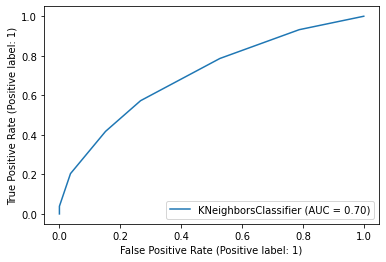

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=5313, stratify=y)
print(X_train[:3])
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {acc}')
print(f'Confusion matrix:\n {cm}')
plot_confusion_matrix(knn, X_test, y_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plot_roc_curve(knn, X_test, y_test)
plt.show()

In [14]:
actual_result_df = df['Survived']
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500


In [15]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0], dtype=int64)

Accuracy: 0.753731343283582
Confusion matrix:
 [[131  34]
 [ 32  71]]


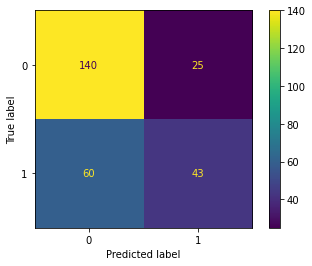

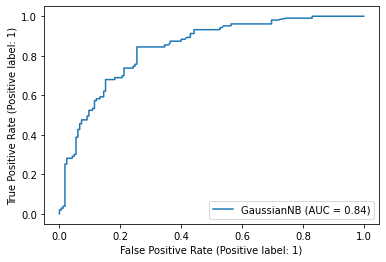

In [16]:
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {acc}')
print(f'Confusion matrix:\n {cm}')
plot_confusion_matrix(knn, X_test, y_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plot_roc_curve(gnb, X_test, y_test)
plt.show()